## Download files and load datasets

In [1]:
# File to annotated docs | Documents annotated using the doccano
# doccano is an open-source package available in github (Need to host it somewhere, or localsetup)
# It helps to annotate the documents
corpus_path = '/content/annotated-docs.jsonl'

In [2]:
import json

def load_jsonl(path):
    data = []
    with open(path, 'r', encoding='utf-8') as reader:
        for line in reader:
            data.append(json.loads(line))
    return data

In [3]:
corpus = load_jsonl(corpus_path)

In [4]:
# Collect all entites into on array
all_entities = []
for cor in corpus:
    entities = []
    for e in cor['label']:
        build_entity = ''
        for i in range(e[0], e[1]):
            build_entity += cor['text'][i]
        entities.append(build_entity)
    all_entities.append(entities)

In [5]:
count = 0
for en in all_entities:
    count += len(en)
print('Entity Count: ',count)

words = 0
for w in corpus:
    words += len(w['text'].split(' '))
print('Word Count: ', words)

Entity Count:  403
Word Count:  15720


In [6]:
sentences = []
for doc in corpus:
    for s in doc['text'].split('.'):
        sentences.append(s)
len(sentences)

855

In [7]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [8]:
from nltk.corpus import stopwords

# Get a list of English stop words
stop_words = stopwords.words('english')

## Format documents according required input params

In [9]:
import re
useless_chars = ['(', ')', ':', '\n\n', '\n', '[', ']']
concat_sent_cfg = []
annotated_docs = []

# Select one item from the '''corpus'''
for idx,document in enumerate(corpus):
    print('----- Running for sub_corpus: ', idx+1,' -----')
    sentences_cfg = []
    # Get an array of entities with starting and ending indexes as '''entities''' and '''text'''
    curr_entities = document['label']
    original_text = document['text']
    for uc in useless_chars:
        original_text = original_text.replace(uc, ' ')
    # Split the text from '''.''' and add the start and ending values from the original text
    for curr_sent in original_text.split('.'):
        if len(curr_sent) > 5:
            for sen in re.finditer(curr_sent, original_text):
                sentences_cfg.append({
                    'text': curr_sent,
                    'start': sen.start(),
                    'end': sen.end()
                })
    # Check whether the tagged entity include in this sentence or not
    for new_sent in sentences_cfg:
        curr_labels = []
        for en in curr_entities:
            if (new_sent['start'] <= en[0] <= new_sent['end']) and (new_sent['start'] <= en[1] <= new_sent['end']):
                # add label entities
                curr_entity = ''.join(original_text[c] for c in range(en[0], en[1]))
                print(curr_entity)
                for ent in re.finditer(curr_entity, new_sent['text']):
                    curr_labels.append([ent.start(), ent.end(), en[2]]) # start index, end index, type
            # Add annotate sentences to annotate_sentences array
        annotated_docs.append({
            'text': new_sent['text'],
            'labels': curr_labels
        })
    # Append all sentences to concat_sent_cfg
    concat_sent_cfg += sentences_cfg

----- Running for sub_corpus:  1  -----
Tick fever
tick fever
Ehrlichiosis and Babesiosis
fever
reduced appetite
lethargy
blood test
serology
tick fever
tick fever
CHRONIC
limping
diarrhoea
bleeding into the eyes
CHRONIC
tiredness
enlarged spleen
increased temperature
tick fever
Loss of appetite
Enlarged lymph nodes
Inflammation of joints
Vomiting
diarrhea
limb swelling
Coughing
Breathing difficulties
Abdominal pain
tick fever
tick fever
tick fever
tick fever
Rocky Mountain spotted fever
fever
loss of appetite
enlargement of the lymph nodes
inflammation of several joints
coughing
difficulty in breathing
abdominal pain
vomiting
diarrhea
swelling of the face
extremities
Rocky Mountain spotted fever
Rocky Mountain spotted fever
Tick fever
tick fever
tick fever
Coughing
Breathing problems
tick fever
----- Running for sub_corpus:  2  -----
fracture bones
fracture
broken leg
Abnormal movement of a limb
Holding the leg up
Swelling in a limb
Pain
Whining
Unwillingness
inability to walk 
intern

In [10]:
len(annotated_docs)

851

In [11]:
# Before pass through the POS tagger, we need to remove stop words
stop_word = ['and', 'the', 'of', 'a', 'in', 'often', 'or', 'to', 'their', 'more', 'than', 'usual', 'for', 'into', 'test']

In [12]:
'''
  {
    'text': 'Tick fever is the general name given to a group of diseases that are all caused by a tick bite', 
    'labels': [[0, 10, 'DISEASE']]
  }
'''
def format_corpus(data, idx):
    ann_tup = []
    curr_sen_en = [[''.join(data['text'][c] for c in range(en[0], en[1])), en[2]] for en in data['labels']]
    for word in data['text'].split(' '):
        en_type = 'OTHER'
        for cse in curr_sen_en:
            for sw in cse[0].split(' '):
                if sw == word:
                    en_type = cse[1]
        if str(word).strip() != '' and not word in stop_word:
            ann_tup.append((word, en_type))
    return ann_tup

## Train POS using Custom Corpus

In [13]:
word_ann_docs = []
for idx,doc in enumerate(annotated_docs):
    word_ann_docs += format_corpus(doc, idx)

In [14]:
for x in word_ann_docs:
    if x[1] != 'OTHER':
        print(x[0])

Tick
fever
tick
Ehrlichiosis
Babesiosis
fever
reduced
lethargy
blood
reduced
tick
fever
tick
fever
CHRONIC
bleeding
eyes
CHRONIC
enlarged
spleen
increased
temperature
tick
fever
Loss
appetite
Enlarged
lymph
nodes
Inflammation
joints
Vomiting
diarrhea
limb
swelling
Coughing
Breathing
difficulties
Abdominal
pain
tick
fever
tick
fever
tick
fever
tick
fever
Rocky
Mountain
spotted
fever
fever
loss
enlargement
lymph
inflammation
several
coughing
difficulty
abdominal
vomiting
swelling
face
extremities
Rocky
Mountain
spotted
fever
Rocky
Mountain
spotted
fever
Tick
fever
tick
fever
tick
fever
Coughing
Breathing
problems
tick
fever
fracture
bones
fracture
broken
leg
Abnormal
movement
limb
Holding
leg
up
Swelling
limb
Pain
Whining
Unwillingness
inability
walk
internal
bleeding
fracture
fracture
fracture
Bone
cancer
Canine
demodicosis
Demodex
hair
mild
occasional
itchiness
itchy
Alopecia
hair
loss
Itchiness
draining
skin
swelling
itchy
lethargic
appetite
scrapings
Canine
distemper
paramyxovirus
Ca

In [15]:
# Helper functions to define the properties of the model
def features(sentence, index):
    return {
        'word': sentence[index],
        'is_first': index == 0,
        'is_last': index == len(sentence) - 1,
        'is_capitalized': sentence[index][0].upper() == sentence[index][0],
        'is_all_caps': sentence[index].upper() == sentence[index],
        'is_all_lower': sentence[index].lower() == sentence[index],
        'prefix-1': sentence[index][0],
        'prefix-2': sentence[index][:2],
        'prefix-3': sentence[index][:3],
        'suffix-1': sentence[index][-1],
        'suffix-2': sentence[index][-2:],
        'suffix-3': sentence[index][-3:],
        'prev_word': '' if index == 0 else sentence[index - 1],
        'next_word': '' if index == len(sentence) - 1 else sentence[index + 1],
        'has_hyphen': '-' in sentence[index],
        'is_numeric': sentence[index].isdigit(),
        'capitals_inside': sentence[index][1:].lower() != sentence[index][1:]
    }

def untag(tagged_sentence):
    return [w for w, t in tagged_sentence]

def transform_to_dataset(tagged_sentences):
    X, y = [], []
 
    for tagged in tagged_sentences:
        for index in range(len(tagged)):
            X.append(features(untag(tagged), index))
            y.append(tagged[index][1])
    return X, y

In [16]:
# Setup dataset as [('Pierre', 'NNP'), ('Vinken', 'NNP'), (',', ',')]
tagged_sentences = [format_corpus(sentence, idx) for idx,sentence in enumerate(annotated_docs)]

# Split the dataset for training and testing
cutoff = int(.75 * len(tagged_sentences))
training_sentences = tagged_sentences[:cutoff]
test_sentences = tagged_sentences[cutoff:]

In [17]:
X, y = transform_to_dataset(training_sentences)

In [18]:
# Train the model using the decision tree classifier to idetify the named entities
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import Pipeline
 
clf = Pipeline([
    ('vectorizer', DictVectorizer(sparse=False)),
    ('classifier', DecisionTreeClassifier(criterion='entropy'))
])
 
clf.fit(X[:10000], y[:10000])

Pipeline(steps=[('vectorizer', DictVectorizer(sparse=False)),
                ('classifier', DecisionTreeClassifier(criterion='entropy'))])

In [19]:
# Save model as pickel file
# sci-kit learn documentation suggest to save the model as .joblib instead of .pickle
import joblib

joblib.dump(clf, 'pos-tagger.joblib')

['pos-tagger.joblib']

## Tryout implementation

In [20]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [21]:
# Preprocessing (remove stop words)
user_input = "My dog has been vomiting and has diarrhea"

# Tokenize the sentence
tokens = nltk.word_tokenize(user_input)

# Remove stop words, (stopwords are getting fromt the NLTK library)
filtered_tokens = [token for token in tokens if token.lower() not in stop_words]

# Filtered tokens as sentence
filtered_user_input = " ".join(filtered_tokens)

In [22]:
# load model
pos_tagger = joblib.load("pos-tagger.joblib")

In [23]:
filtered_user_input

'dog vomiting diarrhea'

In [24]:
from nltk import word_tokenize, pos_tag

def pos_tag(sentence):
  print([features(sentence, index) for index in range(len(sentence))])
  tags = pos_tagger.predict([features(sentence, index) for index in range(len(sentence))])
  return zip(sentence, tags)

list(pos_tag(word_tokenize(filtered_user_input)))

[{'word': 'dog', 'is_first': True, 'is_last': False, 'is_capitalized': False, 'is_all_caps': False, 'is_all_lower': True, 'prefix-1': 'd', 'prefix-2': 'do', 'prefix-3': 'dog', 'suffix-1': 'g', 'suffix-2': 'og', 'suffix-3': 'dog', 'prev_word': '', 'next_word': 'vomiting', 'has_hyphen': False, 'is_numeric': False, 'capitals_inside': False}, {'word': 'vomiting', 'is_first': False, 'is_last': False, 'is_capitalized': False, 'is_all_caps': False, 'is_all_lower': True, 'prefix-1': 'v', 'prefix-2': 'vo', 'prefix-3': 'vom', 'suffix-1': 'g', 'suffix-2': 'ng', 'suffix-3': 'ing', 'prev_word': 'dog', 'next_word': 'diarrhea', 'has_hyphen': False, 'is_numeric': False, 'capitals_inside': False}, {'word': 'diarrhea', 'is_first': False, 'is_last': True, 'is_capitalized': False, 'is_all_caps': False, 'is_all_lower': True, 'prefix-1': 'd', 'prefix-2': 'di', 'prefix-3': 'dia', 'suffix-1': 'a', 'suffix-2': 'ea', 'suffix-3': 'hea', 'prev_word': 'vomiting', 'next_word': '', 'has_hyphen': False, 'is_numeric':

[('dog', 'OTHER'), ('vomiting', 'SYMPTOM'), ('diarrhea', 'SYMPTOM')]

## Evaluation

In [25]:
X_test, y_test = transform_to_dataset(test_sentences)
print("Accuracy:", clf.score(X_test, y_test))

Accuracy: 0.9479921000658328


In [26]:
y_true = y_test # Test data
y_pred = [pos_tagger.predict(word)[0] for word in X_test]
target_names = list(set(y_test))

In [27]:
# Perform one hot encoding

from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
encoder.fit(target_names)

actual = encoder.transform(y_true)
predict = encoder.transform(y_pred)

In [28]:
from sklearn.metrics import classification_report

print(classification_report(actual, predict, target_names=target_names))

              precision    recall  f1-score   support

     DISEASE       0.21      0.16      0.18        50
       OTHER       0.97      0.98      0.97      2898
     SYMPTOM       0.49      0.33      0.40        90

    accuracy                           0.95      3038
   macro avg       0.55      0.49      0.52      3038
weighted avg       0.94      0.95      0.94      3038



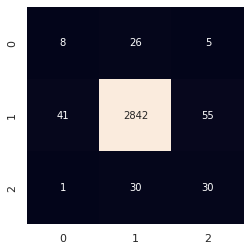

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sb
import matplotlib as pt

sb.set()
get_ipython().run_line_magic('matplotlib', 'inline')
con_matrix = confusion_matrix(actual, predict)
sb.heatmap(con_matrix.T, square=True, annot=True, fmt='d', cbar=False)